## Concrete Strength Prediction Model-

#### Submitted by-
 - Varun Kumar Kashyap    - 502304212
 - Danish Madaan          - 502304224


### Step 1-
      - Data Collection
      - Pre-Processing 
      - Cleansing
      - Summary
      - Non-Visual Analysis

In [1]:
# Importing Required Libraries- 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the data 
df1 = pd.read_excel("Plant Cube Result (1).xlsx")


In [3]:
df1

,Date of Casting,Site Name,Site Type,D No.,Grade,Mix Code,Cement,PFA,Cement Correction,Actual Cement,Cement Type,Av.3 Days,7 Days,Unnamed: 13,Av.7 Days,28 Days,Unnamed: 16,Unnamed: 17,Av.28 Days,Unnamed: 19
0,24.04.2019,Highland Park Homes,B2B,6184,M25,FGBMH105,240.0,110.0,0.0,240.0,OPC,9.43,12.34,13.44,12.890,25.17,24.30,NaN,24.735,NaN
1,25.04.2019,Tedre Realcon India Pvt. Ltd.,B2B,6186,M25,FGBMH103,210.0,140.0,0.0,210.0,OPC,NaN,6.24,6.12,6.180,16.57,0.00,NaN,16.570,NaN
2,25.04.2019,Surindra Builders,B2B,6202,M25,FGBMH103,210.0,140.0,0.0,210.0,OPC,15.48,16.35,16.46,16.405,25.85,29.96,29.48,28.430,NaN
3,26.04.2019,Proactive Construction Pvt. Ltd.,B2B,6217,M25,FGBMH101,230.0,120.0,0.0,230.0,OPC,15.64,16.87,17.97,17.420,29.88,32.30,0.00,31.090,NaN
4,26.04.2019,Proactive Construction Pvt. Ltd.,B2B,6225,M25,FGBMH101,230.0,120.0,0.0,230.0,OPC,9.51,14.13,13.45,13.790,23.51,22.47,NaN,22.990,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN
4468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN
4469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN
4470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN


In [4]:
# Top 5 data values

df1.head()

,Date of Casting,Site Name,Site Type,D No.,Grade,Mix Code,Cement,PFA,Cement Correction,Actual Cement,Cement Type,Av.3 Days,7 Days,Unnamed: 13,Av.7 Days,28 Days,Unnamed: 16,Unnamed: 17,Av.28 Days,Unnamed: 19
0,24.04.2019,Highland Park Homes,B2B,6184,M25,FGBMH105,240.0,110.0,0.0,240.0,OPC,9.43,12.34,13.44,12.890,25.17,24.30,NaN,24.735,NaN
1,25.04.2019,Tedre Realcon India Pvt. Ltd.,B2B,6186,M25,FGBMH103,210.0,140.0,0.0,210.0,OPC,NaN,6.24,6.12,6.180,16.57,0.00,NaN,16.570,NaN
2,25.04.2019,Surindra Builders,B2B,6202,M25,FGBMH103,210.0,140.0,0.0,210.0,OPC,15.48,16.35,16.46,16.405,25.85,29.96,29.48,28.430,NaN
3,26.04.2019,Proactive Construction Pvt. Ltd.,B2B,6217,M25,FGBMH101,230.0,120.0,0.0,230.0,OPC,15.64,16.87,17.97,17.420,29.88,32.30,0.00,31.090,NaN
4,26.04.2019,Proactive Construction Pvt. Ltd.,B2B,6225,M25,FGBMH101,230.0,120.0,0.0,230.0,OPC,9.51,14.13,13.45,13.790,23.51,22.47,NaN,22.990,NaN


In [5]:
# Checking the shape
df1.shape

(4472, 20)

In [6]:
df1.columns

Index(['Date of Casting', 'Site Name', 'Site Type ', 'D No.', 'Grade',
       'Mix Code', 'Cement', 'PFA', 'Cement Correction', 'Actual Cement',
       'Cement Type', ' Av.3 Days', '7 Days', 'Unnamed: 13', ' Av.7 Days',
       '28 Days', 'Unnamed: 16', 'Unnamed: 17', ' Av.28 Days', 'Unnamed: 19'],
      dtype='object')

In [7]:
# Overall Information about Dataset 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4472 entries, 0 to 4471
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date of Casting    4364 non-null   object 
 1   Site Name          4364 non-null   object 
 2   Site Type          4343 non-null   object 
 3   D No.              4358 non-null   object 
 4   Grade              4364 non-null   object 
 5   Mix Code           4364 non-null   object 
 6   Cement             4364 non-null   float64
 7   PFA                4364 non-null   float64
 8   Cement Correction  4364 non-null   float64
 9   Actual Cement      4364 non-null   float64
 10  Cement Type        4364 non-null   object 
 11   Av.3 Days         1648 non-null   object 
 12  7 Days             4233 non-null   float64
 13  Unnamed: 13        4208 non-null   float64
 14   Av.7 Days         4468 non-null   float64
 15  28 Days            4049 non-null   float64
 16  Unnamed: 16        4001 

In [8]:
# Check the Null Values

df1.isnull().sum()

Date of Casting       108
Site Name             108
Site Type             129
D No.                 114
Grade                 108
Mix Code              108
Cement                108
PFA                   108
Cement Correction     108
Actual Cement         108
Cement Type           108
 Av.3 Days           2824
7 Days                239
Unnamed: 13           264
 Av.7 Days              4
28 Days               423
Unnamed: 16           471
Unnamed: 17          1418
 Av.28 Days             6
Unnamed: 19          4470
dtype: int64

In [9]:
# Dropping Unwanted Columns for prediction model

df1.drop(['Date of Casting', 'D No.', 'Grade', 
          'Mix Code', 'Cement Correction', '7 Days', 
          'Unnamed: 13', '28 Days', 'Unnamed: 16', 'Unnamed: 17',
          'Unnamed: 19'], axis=1, inplace=True)

In [10]:
df1


,Site Name,Site Type,Cement,PFA,Actual Cement,Cement Type,Av.3 Days,Av.7 Days,Av.28 Days
0,Highland Park Homes,B2B,240.0,110.0,240.0,OPC,9.43,12.890,24.735
1,Tedre Realcon India Pvt. Ltd.,B2B,210.0,140.0,210.0,OPC,NaN,6.180,16.570
2,Surindra Builders,B2B,210.0,140.0,210.0,OPC,15.48,16.405,28.430
3,Proactive Construction Pvt. Ltd.,B2B,230.0,120.0,230.0,OPC,15.64,17.420,31.090
4,Proactive Construction Pvt. Ltd.,B2B,230.0,120.0,230.0,OPC,9.51,13.790,22.990
...,...,...,...,...,...,...,...,...,...
4467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000
4468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000
4469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000
4470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000


In [11]:
# Checking for remaining Null Values

df1.isnull().sum() 

Site Name         108
Site Type         129
Cement            108
PFA               108
Actual Cement     108
Cement Type       108
 Av.3 Days       2824
 Av.7 Days          4
 Av.28 Days         6
dtype: int64

In [12]:
# Dropping the Null Values 

df1.dropna(inplace=True)

In [13]:
df1


,Site Name,Site Type,Cement,PFA,Actual Cement,Cement Type,Av.3 Days,Av.7 Days,Av.28 Days
0,Highland Park Homes,B2B,240.0,110.0,240.0,OPC,9.43,12.890,24.735000
2,Surindra Builders,B2B,210.0,140.0,210.0,OPC,15.48,16.405,28.430000
3,Proactive Construction Pvt. Ltd.,B2B,230.0,120.0,230.0,OPC,15.64,17.420,31.090000
4,Proactive Construction Pvt. Ltd.,B2B,230.0,120.0,230.0,OPC,9.51,13.790,22.990000
5,GBP Infrastructure Pvt. Ltd.,B2B,280.0,80.0,280.0,PPC,20,30.985,37.650000
...,...,...,...,...,...,...,...,...,...
3185,Maya Estate,B2B,185.0,185.0,185.0,OPC,UL,8.855,21.780000
3321,Himachal Traders Pvt. Ltd.,B2B,280.0,120.0,280.0,OPC,28.56,29.280,43.660000
3331,TDI Infratech Ltd.,B2B,420.0,200.0,420.0,OPC,37.92,38.200,59.560000
3337,Noble Dream Projects,B2B,300.0,235.0,300.0,OPC,27.65,27.420,40.386667


In [14]:
# Dropping more unwanted columns
df1.drop(['Site Type '], axis=1, inplace=True)


In [15]:
df1

,Site Name,Cement,PFA,Actual Cement,Cement Type,Av.3 Days,Av.7 Days,Av.28 Days
0,Highland Park Homes,240.0,110.0,240.0,OPC,9.43,12.890,24.735000
2,Surindra Builders,210.0,140.0,210.0,OPC,15.48,16.405,28.430000
3,Proactive Construction Pvt. Ltd.,230.0,120.0,230.0,OPC,15.64,17.420,31.090000
4,Proactive Construction Pvt. Ltd.,230.0,120.0,230.0,OPC,9.51,13.790,22.990000
5,GBP Infrastructure Pvt. Ltd.,280.0,80.0,280.0,PPC,20,30.985,37.650000
...,...,...,...,...,...,...,...,...
3185,Maya Estate,185.0,185.0,185.0,OPC,UL,8.855,21.780000
3321,Himachal Traders Pvt. Ltd.,280.0,120.0,280.0,OPC,28.56,29.280,43.660000
3331,TDI Infratech Ltd.,420.0,200.0,420.0,OPC,37.92,38.200,59.560000
3337,Noble Dream Projects,300.0,235.0,300.0,OPC,27.65,27.420,40.386667


In [16]:
df1.drop(['Cement Type'], axis=1, inplace=True)

In [17]:
df1

,Site Name,Cement,PFA,Actual Cement,Av.3 Days,Av.7 Days,Av.28 Days
0,Highland Park Homes,240.0,110.0,240.0,9.43,12.890,24.735000
2,Surindra Builders,210.0,140.0,210.0,15.48,16.405,28.430000
3,Proactive Construction Pvt. Ltd.,230.0,120.0,230.0,15.64,17.420,31.090000
4,Proactive Construction Pvt. Ltd.,230.0,120.0,230.0,9.51,13.790,22.990000
5,GBP Infrastructure Pvt. Ltd.,280.0,80.0,280.0,20,30.985,37.650000
...,...,...,...,...,...,...,...
3185,Maya Estate,185.0,185.0,185.0,UL,8.855,21.780000
3321,Himachal Traders Pvt. Ltd.,280.0,120.0,280.0,28.56,29.280,43.660000
3331,TDI Infratech Ltd.,420.0,200.0,420.0,37.92,38.200,59.560000
3337,Noble Dream Projects,300.0,235.0,300.0,27.65,27.420,40.386667


In [18]:
# Summary statistics for numerical columns
df1.describe()

,Cement,PFA,Actual Cement,Av.7 Days,Av.28 Days
count,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000
mean,264.172287,121.612508,264.076640,20.905509,33.203233
std,80.399625,42.327667,80.256779,9.644973,12.006273
min,130.000000,0.000000,130.000000,0.000000,0.000000
25%,200.000000,100.000000,200.000000,14.320000,25.858333
50%,250.000000,140.000000,250.000000,18.250000,31.373333
75%,280.000000,140.000000,280.000000,24.705000,39.335000
max,560.000000,240.000000,560.000000,58.480000,70.193333


In [19]:
# Basic Info about cleaned data to be used 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1631 entries, 0 to 3362
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site Name      1631 non-null   object 
 1   Cement         1631 non-null   float64
 2   PFA            1631 non-null   float64
 3   Actual Cement  1631 non-null   float64
 4    Av.3 Days     1631 non-null   object 
 5    Av.7 Days     1631 non-null   float64
 6    Av.28 Days    1631 non-null   float64
dtypes: float64(5), object(2)
memory usage: 101.9+ KB


In [20]:
# Convert non-numerical data to null values
df1 = df1.apply(pd.to_numeric, errors='coerce')

In [21]:
# Checking for converted null values 
df1.isnull().sum()

Site Name        1631
Cement              0
PFA                 0
Actual Cement       0
 Av.3 Days          3
 Av.7 Days          0
 Av.28 Days         0
dtype: int64

In [22]:
# Correlation matrix
print("Correlation matrix:")
print(df1.corr())

Correlation matrix:
               Site Name    Cement       PFA  Actual Cement   Av.3 Days  \
Site Name            NaN       NaN       NaN            NaN         NaN   
Cement               NaN  1.000000 -0.497368       0.999781    0.865160   
PFA                  NaN -0.497368  1.000000      -0.496004   -0.264313   
Actual Cement        NaN  0.999781 -0.496004       1.000000    0.865382   
 Av.3 Days           NaN  0.865160 -0.264313       0.865382    1.000000   
 Av.7 Days           NaN  0.818057 -0.264924       0.818206    0.930320   
 Av.28 Days          NaN  0.676151 -0.221626       0.676128    0.761826   

                Av.7 Days   Av.28 Days  
Site Name             NaN          NaN  
Cement           0.818057     0.676151  
PFA             -0.264924    -0.221626  
Actual Cement    0.818206     0.676128  
 Av.3 Days       0.930320     0.761826  
 Av.7 Days       1.000000     0.806678  
 Av.28 Days      0.806678     1.000000  


In [23]:
# Skewness of numerical columns
print("Skewness of numerical columns:")
print(df1.skew())

# Kurtosis of numerical columns
print("Kurtosis of numerical columns:")
print(df1.kurtosis())

Skewness of numerical columns:
Site Name             NaN
Cement           1.544480
PFA             -0.967494
Actual Cement    1.544409
 Av.3 Days       1.450929
 Av.7 Days       1.184929
 Av.28 Days      0.265849
dtype: float64
Kurtosis of numerical columns:
Site Name             NaN
Cement           2.120882
PFA              1.664793
Actual Cement    2.122457
 Av.3 Days       1.790145
 Av.7 Days       1.395650
 Av.28 Days      0.947362
dtype: float64


In [24]:
df1

,Site Name,Cement,PFA,Actual Cement,Av.3 Days,Av.7 Days,Av.28 Days
0,NaN,240.0,110.0,240.0,9.43,12.890,24.735000
2,NaN,210.0,140.0,210.0,15.48,16.405,28.430000
3,NaN,230.0,120.0,230.0,15.64,17.420,31.090000
4,NaN,230.0,120.0,230.0,9.51,13.790,22.990000
5,NaN,280.0,80.0,280.0,20.00,30.985,37.650000
...,...,...,...,...,...,...,...
3185,NaN,185.0,185.0,185.0,NaN,8.855,21.780000
3321,NaN,280.0,120.0,280.0,28.56,29.280,43.660000
3331,NaN,420.0,200.0,420.0,37.92,38.200,59.560000
3337,NaN,300.0,235.0,300.0,27.65,27.420,40.386667


In [25]:
df1.drop(['Site Name'], axis=1, inplace=True)

In [26]:
df1

,Cement,PFA,Actual Cement,Av.3 Days,Av.7 Days,Av.28 Days
0,240.0,110.0,240.0,9.43,12.890,24.735000
2,210.0,140.0,210.0,15.48,16.405,28.430000
3,230.0,120.0,230.0,15.64,17.420,31.090000
4,230.0,120.0,230.0,9.51,13.790,22.990000
5,280.0,80.0,280.0,20.00,30.985,37.650000
...,...,...,...,...,...,...
3185,185.0,185.0,185.0,NaN,8.855,21.780000
3321,280.0,120.0,280.0,28.56,29.280,43.660000
3331,420.0,200.0,420.0,37.92,38.200,59.560000
3337,300.0,235.0,300.0,27.65,27.420,40.386667


## Step 2 - 
  - Exploratory Data Analysis (EDA)
  - Model Training
  - Visualization of Model Performance
  - Strength Predictor

In [27]:
# Importing required Libraries 

import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


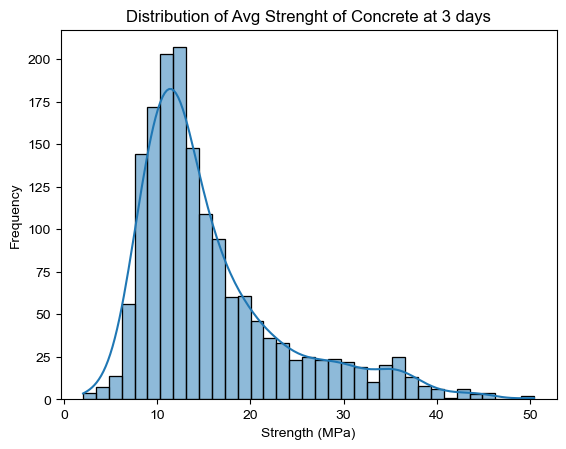

In [28]:
# Visualizing the distribution of the target variable (strength)

sns.histplot(df1[' Av.3 Days'], kde=True)
sns.set_theme(style="white")
plt.title('Distribution of Avg Strenght of Concrete at 3 days')
plt.xlabel('Strength (MPa)')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


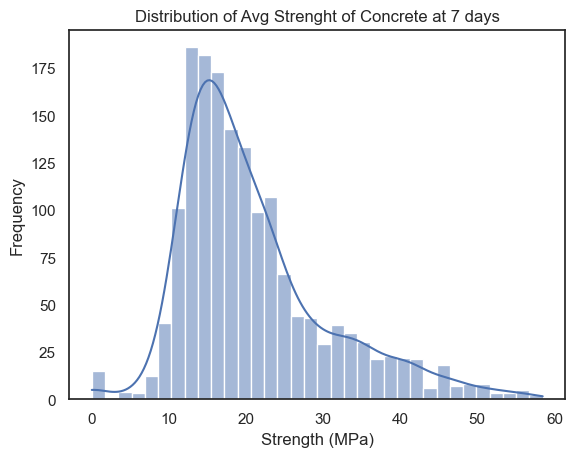

In [29]:
sns.histplot(df1[' Av.7 Days'], kde=True)
sns.set_theme(style="white")
plt.title('Distribution of Avg Strenght of Concrete at 7 days')
plt.xlabel('Strength (MPa)')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


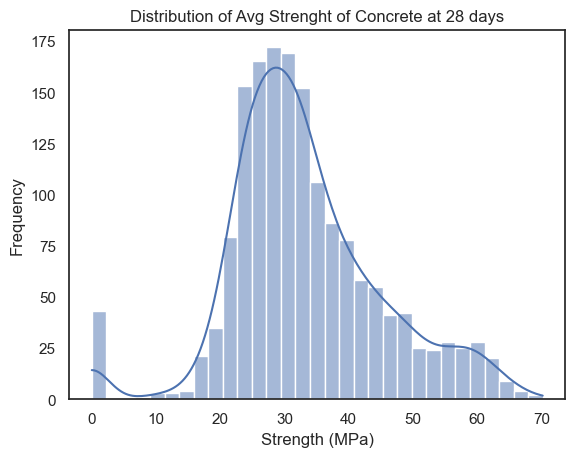

In [30]:
sns.histplot(df1[' Av.28 Days'], kde=True)
sns.set_theme(style="white")
plt.title('Distribution of Avg Strenght of Concrete at 28 days')
plt.xlabel('Strength (MPa)')
plt.ylabel('Frequency')
plt.show()

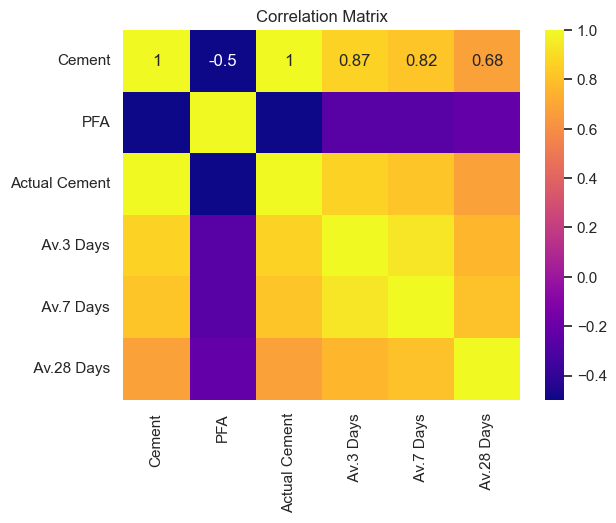

In [31]:
# Visualizing the correlation matrix
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='plasma')
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Importing Required Libraries for Model Training 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Spliting the dataset into features and target variable for final Strength of concrete
x = df1[['Cement', 'PFA', 'Actual Cement']]
y = df1[' Av.28 Days']

In [34]:
# Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
# Initializing the Linear Regression model
model = LinearRegression()

In [36]:
# Training the model
model.fit(x_train, y_train)


LinearRegression()

In [37]:
# Making predictions on the test set
y_pred = model.predict(x_test)


In [38]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 81.3228852388184
R-squared Score: 0.3730145916446198


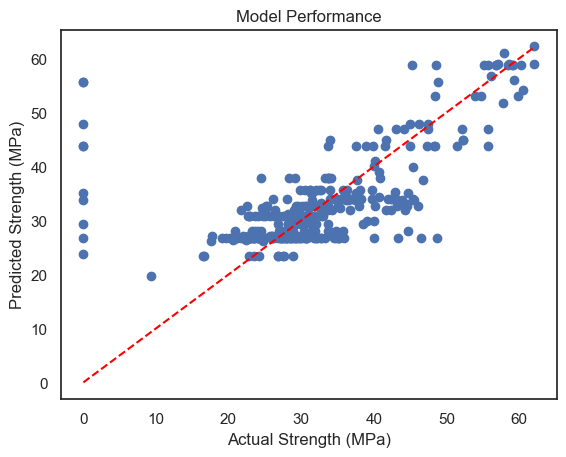

In [39]:
# Visualizing the model's predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Strength (MPa)')
plt.ylabel('Predicted Strength (MPa)')
plt.title('Model Performance')
plt.show()

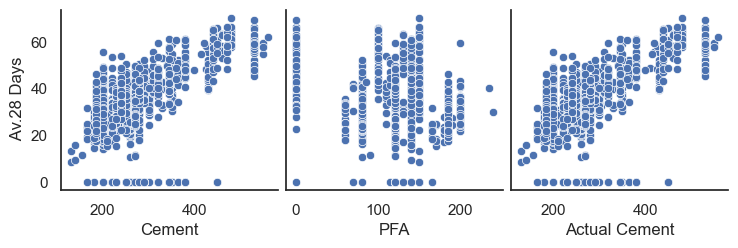

In [40]:
# Scatter plot between features and target variable
sns.pairplot(df1, x_vars=['Cement', 'PFA', 'Actual Cement'], y_vars=[' Av.28 Days'], kind='scatter')
plt.show()

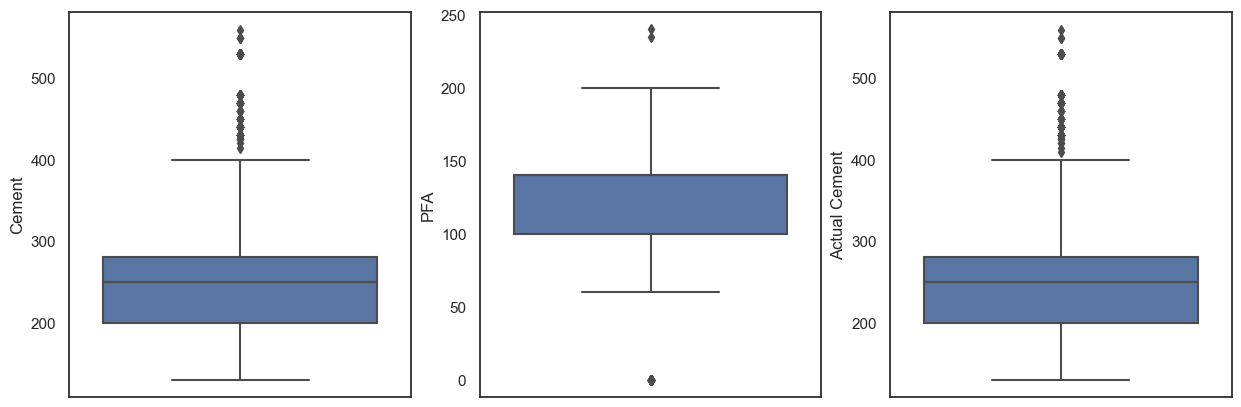

In [41]:
# Boxplot for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(['Cement', 'PFA', 'Actual Cement']):
    sns.boxplot(y=col, data=df1, ax=axes[i])
plt.show()

In [43]:
# Prediction of Concrete Strength

def predict_strength(model):
    
    Cement = float(input("Enter the amount of Cement (in kgs): "))
    PFA = float(input("Enter the amount of PFA (in kgs): "))
    Actual_Cement = float(input("Enter the amount of Actual Cement (in kgs): "))

    # Preparing input data for prediction
    input_data = [[Cement, PFA, Actual_Cement]]

    # Making prediction
    predicted_strength = model.predict(input_data)[0]

    print(f"Predicted average 28 days strength: {predicted_strength:.2f} MPa")


predict_strength(model)

Enter the amount of Cement (in kgs):  240
Enter the amount of PFA (in kgs):  120
Enter the amount of Actual Cement (in kgs):  240


Predicted average 28 days strength: 30.46 MPa


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
